###  Importing the necessary libraries:

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd

# A. Fashion MNIST Classification Model using DNN

### 1. Loading the dataset:

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

### 2. Data preprocessing

In [3]:
#Rescaling the data by dividing the training and testing samples by 255.
x_train, x_test = x_train / 255.0, x_test / 255.0

#Exploring the data instances and shape so we can build our network based on those informations.
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(60000,)
(60000, 28, 28)
(10000,)
(10000, 28, 28)


### 3. Encode the target (y) values:

In [4]:
#Using one_hot() function encode the classes into a (0,1) to prevent the model from assuming a natural ordering between categories that may result in poor performance. 
y_train, y_test = tf.one_hot(y_train, depth=len(set(y_train))), tf.one_hot(y_test, depth=len(set(y_test)))

### 4. Data pipeline:

In [5]:
#Building a function to build data pipeline with our dataset.
def dataset_creater(x,y,training=False):
    data=tf.data.Dataset.from_tensor_slices((x,y)) #Using tf.data API to perform data pipeline.
    data=data.shuffle(1028) #Shuffling the data with 1028 seed.
    data=data.batch(32) #Setting the batch size during training to 32. 
    data=data.prefetch(tf.data.experimental.AUTOTUNE) #Using data.prefetch() function to make the CPU perform multithreading.
    return data

#Using data pipeline function on our training dataset.
train_dataset=dataset_creater(x_train,y_train,training=True)

### 5. Building, Compiling and Training the classification model using DNN:

In [6]:
#Deleting tensorflow and importing it again to prevent the model from the saving the weights after training.
del tf 
import tensorflow as tf 

tf.random.set_seed(42) #Setting the graph-level random seed to get the same random numbers at every session (reproducible results). 

#Building the model using tensorflow's Sequential API for easier implementation.
model=tf.keras.Sequential([
                           tf.keras.layers.Input([28,28,1]), #Input layer with with images size and chanels to hold the features from the dataset.
                           tf.keras.layers.Flatten(), #Flattening the images into one vector.
                           tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu), #Hidden layer with 10 units to be trained, with leaky_relu to eleminate linearity.
                           tf.keras.layers.Dropout(0.4), #Dropout layer to reduce overfitting.
                           tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax) #Output layer with 10 units to represent the 10 classes of the dataset.

                           ])

In [7]:
#Compiling the model by using Adam() as the optimizer and CategoricalCrossentropy() as this is a multi-class problem.
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])

#Training the model.
history = model.fit(train_dataset,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6445 - acc: 0.7691 - val_loss: 0.4529 - val_acc: 0.8360
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4887 - acc: 0.8249 - val_loss: 0.4187 - val_acc: 0.8466
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4543 - acc: 0.8361 - val_loss: 0.4156 - val_acc: 0.8488
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4373 - acc: 0.8433 - val_loss: 0.3975 - val_acc: 0.8569
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4284 - acc: 0.8462 - val_loss: 0.4001 - val_acc: 0.8555
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4179 - acc: 0.8497 - val_loss: 0.4040 - val_acc: 0.8515
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4094 - acc: 0.8535 - val_loss: 0.3834 - val_acc: 0.8621
Epoch 8/30
1875/1875 [==============================] - 4s 2ms

### 6. Plotting the results:

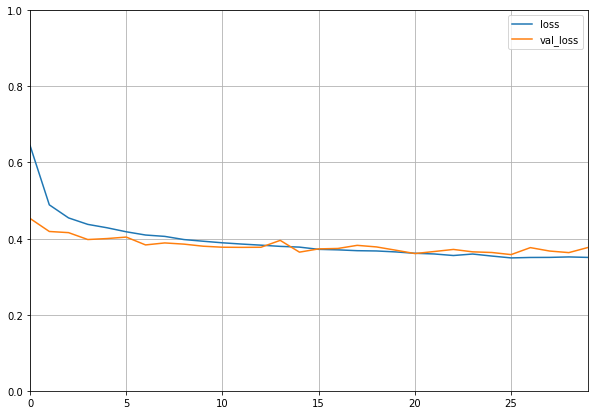

In [8]:
#Plotting the results to look for overfitting within the results.
#Converting the results into a data frame using Pandas tool.
df = pd.DataFrame(history.history)
df[['loss','val_loss']].plot(figsize=(10, 7))

#Plotting the data frame using matplotlib library.
plt.grid(True)
plt.gca().set_ylim(0,1) #Setting the x-axis.
plt.gca().set_xlim(0,29) #Setting the y-axis.
                              
plt.show()

### 7. Model evaluation:

In [9]:
#Evaluating the model on the test (validation) data samples.
print('Model Loss and Accuracy:', model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.3767 - acc: 0.8695
Model Loss and Accuracy: [0.3767004609107971, 0.8694999814033508]


# B. Fashion MNIST Classification Model using CNN

### 1. Loading the dataset:

In [10]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

### 2. Data preprocessing

In [11]:
#Rescaling the data by dividing the training and testing samples by 255.
x_train, x_test = x_train / 255.0, x_test / 255.0

#Reshaping the data by adding a the chanel vector
x_train = x_train.reshape(60000, 28, 28, 1)     
x_test = x_test.reshape(10000, 28, 28, 1)

#Exploring the data instances and shape so we can build our network based on those informations.
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(60000,)
(60000, 28, 28, 1)
(10000,)
(10000, 28, 28, 1)


### 3. Encode the target (y) values:

In [12]:
#Using one_hot() function encode the classes into a (0,1) to prevent the model from assuming a natural ordering between categories that may result in poor performance. 
y_train, y_test = tf.one_hot(y_train, depth=len(set(y_train))), tf.one_hot(y_test, depth=len(set(y_test)))

### 4. Data pipeline:

In [13]:
#Building a function to build data pipeline with our dataset.
def dataset_creater(x,y,training=False):
    data=tf.data.Dataset.from_tensor_slices((x,y)) #Using tf.data API to perform data pipeline.
    data=data.shuffle(1028) #Shuffling the data with 1028 seed.
    data=data.batch(32) #Setting the batch size during training to 32. 
    data=data.prefetch(tf.data.experimental.AUTOTUNE) #Using data.prefetch() function to make the CPU perform multithreading.
    return data

#Using data pipeline function on our training dataset.
train_dataset=dataset_creater(x_train,y_train,training=True)

### 5. Building, Compiling and Training the classification model using DNN:

In [25]:
#Deleting tensorflow and importing it again to prevent the model from the saving the weights after training.
del tf 
import tensorflow as tf 

tf.random.set_seed(42) #Setting the graph-level random seed to get the same random numbers at every session (reproducible results).

#Building the model using tensorflow's Sequential API for easier implementation.
model=tf.keras.Sequential([
                           tf.keras.layers.Input([28, 28, 1]), #Input layer with images size and chanels to hold the features from the dataset.
                           tf.keras.layers.Conv2D(8,3,1,padding='same',activation=tf.nn.leaky_relu), #Convolutional layer, with (3,3) kernel and stride of 1 to disect the image.
                           tf.keras.layers.MaxPool2D(), #Pooling layer to reduce linearity.
                           
                           tf.keras.layers.Conv2D(32,3,1,padding='same',activation=tf.nn.leaky_relu),
                           tf.keras.layers.MaxPool2D(),
                           tf.keras.layers.Dropout(0.3), #Dropout layer to avoid overfitting.

                           tf.keras.layers.Flatten(), #Flattenning layer to convert the features into a long vector.
                           tf.keras.layers.Dense(32,activation=tf.nn.leaky_relu), #Hidden layer with 32 neurons to be trained.
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax), #Output layer with 10 units to represent the 10 classes of the dataset.

                          

])

In [26]:
#Compiling the model by using Adam() as the optimizer and CategoricalCrossentropy() as this is a multi-class problem.
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])

#Training the model.
history = model.fit(train_dataset,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6599 - acc: 0.7638 - val_loss: 0.4135 - val_acc: 0.8471
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4676 - acc: 0.8369 - val_loss: 0.3713 - val_acc: 0.8640
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4156 - acc: 0.8534 - val_loss: 0.3412 - val_acc: 0.8755
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3835 - acc: 0.8633 - val_loss: 0.3273 - val_acc: 0.8802
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3674 - acc: 0.8703 - val_loss: 0.3018 - val_acc: 0.8883
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3543 - acc: 0.8755 - val_loss: 0.2942 - val_acc: 0.8929
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3414 - acc: 0.8796 - val_loss: 0.2938 - val_acc: 0.8931
Epoch 8/50
1875/1875 [==============================] - 5s 3ms

### 6. Plotting the results:

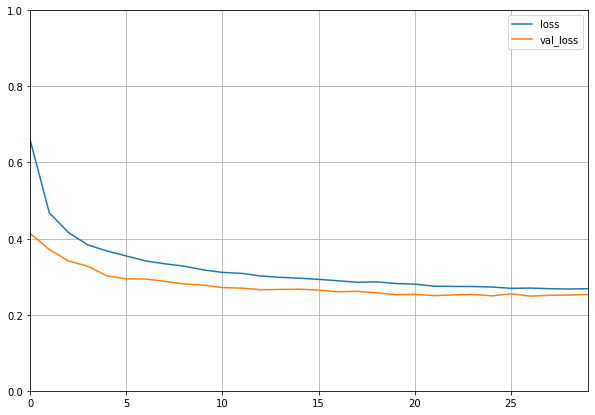

In [27]:
#Plotting the results to look for overfitting within the results.
#Converting the results into a data frame using Pandas tool.
df = pd.DataFrame(history.history)
df[['loss','val_loss']].plot(figsize=(10, 7))

#Plotting the data frame using matplotlib library.
plt.grid(True)
plt.gca().set_ylim(0,1) #Setting the x-axis.
plt.gca().set_xlim(0,29) #Setting the y-axis.
                              
plt.show()

### 7. Model evaluation:

In [17]:
#Evaluating the model on the test (validation) data samples.
print('Model Loss and Accuracy:', model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.2748 - acc: 0.9033
Model Loss and Accuracy: [0.2747703790664673, 0.9032999873161316]


### Notes:

- When i added the dropout layer to the convolutional layers, the overfitting was reduced. 